# Identify Customer Segments For Online Retail With The Use Of K-Means Clustering by - Bhoomi Soni

# Goal
The objective of this project is to determine customer segmentation from a dataset of an online retail e-commerce company using K-Means Clustering, an unsupervised machine learning algorithm. By applying the K-Means Clustering technique, we can obtain several distinct clusters such as 2, 3, 4, or more, where each cluster represents a specific customer group within the online retail business.



In [ ]:
# Importing all the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#Ignore Python Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
retail_df = pd.read_excel("Online Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# shape of dataset
retail_df.shape

(541909, 8)

In [ ]:
# Information about dataset and its datatype
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 In this dataset, there are 2 columns with missing values:


In [ ]:
# Descriptive statistical summary of the dataset -
retail_df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## Data Cleaning and Pre-processiing


removing cash mis-macth

creating user function to convert alphabetic characters to uppercase

In [ ]:
# Function to convert alphabetic characters to uppercase

def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [ ]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the Function Created.

retail_df = retail_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)

### Assignning Correct Datatype

changing datatype of **InvoiceDate** to '**CustomerId**' to 'Object' Datatype.

In [ ]:
#  Changing Datatype of InvoiceDate to Datetime Datatype
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [ ]:
# Changing datatype of CustomerID from 'float64' to 'object'
retail_df['CustomerID'] = retail_df['CustomerID'].astype('object')

In [ ]:
# checking change to Dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### Checking for Duplicates Rows


In [ ]:
# checking for Duplicate Entrie in our dataset
retail_df.duplicated().sum()

5268

In [ ]:
# Removing Duplicates and checking shape change
retail_df.drop_duplicates(inplace = True)
retail_df.shape

(536641, 8)

Checking For misiing value in the dataset

In [ ]:
# chacking null values in the dataset
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
# Checking percantage of null values
retail_df.isna().sum()/len(retail_df)*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.270945
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,25.163377
Country,0.000000


There are 2 columns having Missing Values

- **CustomerID** cloumns has arround 25.16%
missing value i.e  ~135k null values

- **Description** columns has arround 0.27 %
missing values i.e 1454 null values


To deal with missing values in CustomerID, which has around 25.16% of null data, We can Drop all the rows with missing CustomerID.

This decision was made because the aim of this project is to find customer segments by exploring data at customer level, therefore all observations that are not assigned to a particular customer cannot be used for analysis.




In [ ]:
# Dropping all row that has null 'CustomerId'

retail_df.dropna(axis=0 , subset=['CustomerID'], inplace=True)

In [ ]:
# Now,let's check the changes and remaining null values in our dataset
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Checking Shape change of our Dataset
retail_df.shape

(401604, 8)



By droping the null values of CustomerID column, we can see that null values of Description column also gets removed.

Thus, now we don't have any missing values in our dataset.



## Feature Engineering


In [ ]:
# Creting new variable 'Total_Amount' = Quantity * UnitPrice for each other
retail_df['Total_Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34


As per the data dictionary, InvoiceNo starting with a 'C' are the cancelled orders.

Thus, creating new feature variable Is_Cancelled, having value '0' if the order is Not Cancelled and value '1' if the order is Cancelled


In [ ]:
## Creting new variable Is_Cancelled
retail_df['Is_Cancelled'] = retail_df['InvoiceNo'].apply(lambda x: 1 if isinstance(x, str) and x.startswith('C') else 0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Is_Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0


In [ ]:
# check the value count of Cancelled Orders
retail_df['Is_Cancelled'].value_counts()

,count
Is_Cancelled,
0,392732
1,8872


In [ ]:
#checking percantages of cancelled orders
retail_df['Is_Cancelled'].value_counts()/len(retail_df)*100

,count
Is_Cancelled,
0,97.790859
1,2.209141


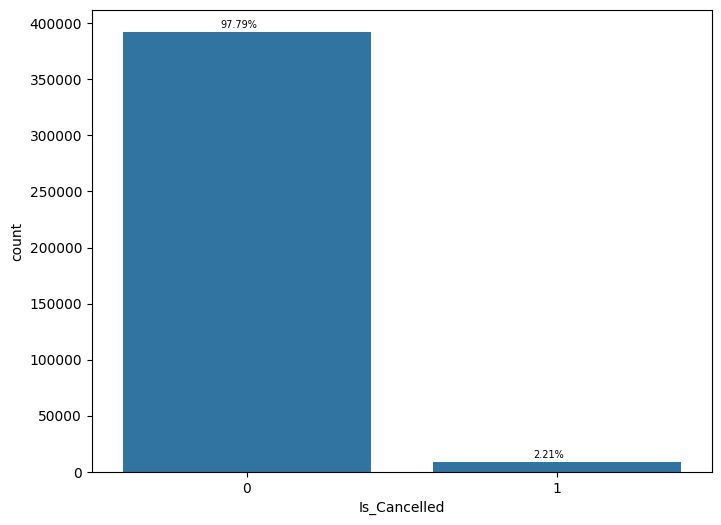

In [ ]:
# visualize the Cancelled order percentage
plt.figure(figsize=[8,6])
ax = sns.countplot(x=retail_df['Is_Cancelled'],  legend='auto')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(retail_df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7, color='black', xytext=(5,5),
               textcoords='offset points')
plt.show()

Their are only 2.21% of Cancelled Orders (i.e. 8872)
And rest 97.79% Orders are not cancelled (i.e. 392732)

#### Creating new Dataframe as Customer_Profile by grouping all the data by CustomerID

 let's start creating Customer_Profile by grouping data by CustomerID. This will make it easier to explore customers characteristics.**




In [ ]:
# create an empty Dataframe as Cutomer_profile'
Customer_profile = pd.DataFrame()

### Calculating Total number of orders per customer i.e Freqency which is defined as how frequent is the customer in order/buying some product

In [ ]:
Customer_profile['frequency'] = retail_df.groupby('CustomerID')['InvoiceNo'].count()
Customer_profile['frequency'].head()

,frequency
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17


In [ ]:
# Calculating the Total Spending or order value per customer i.e. `Monetary` and storing in Dataframe `Customer_Profile`
Customer_profile['Monetary'] = retail_df.groupby(by='CustomerID')['Total_Amount'].sum()
Customer_profile['Monetary'].head()

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


 Calculating the total item quantity ordered by each customer i.e. Quantity_per_Customer



In [ ]:
Customer_profile['Quantity_per_Customer'] = retail_df.groupby(by='CustomerID')['Quantity'].sum()
Customer_profile['Quantity_per_Customer'].head()

,Quantity_per_Customer
CustomerID,
12346.0,0
12347.0,2458
12348.0,2341
12349.0,631
12350.0,197


### calculating the Average_Item_Price of all the items ordered by each customer, to see if the customer buys expensive items or not_

In [ ]:
Customer_profile['Avg_Item_Price'] = retail_df.groupby(by='CustomerID')['UnitPrice'].mean()
Customer_profile['Avg_Item_Price'].head()

,Avg_Item_Price
CustomerID,
12346.0,1.040000
12347.0,2.644011
12348.0,5.764839
12349.0,8.289041
12350.0,3.841176


### Calculating Total Cancelled Orders by each customer i.e. Order_Cancellations


In [ ]:
# Calculating Total Cancelled orders by each customer
Customer_profile['Order_Cancellations'] = retail_df.groupby(by='CustomerID')['Is_Cancelled'].sum()
Customer_profile['Order_Cancellations'].head()

,Order_Cancellations
CustomerID,
12346.0,1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


Let's add Country of each customer in our Customer_Profile Dataframe

In [ ]:
# Adding Country of each customer
Customer_profile['Country'] = retail_df.groupby(by='CustomerID')['Country'].first()
Customer_profile['Country'].value_counts()

,count
Country,
UNITED KINGDOM,3950
GERMANY,95
FRANCE,87
SPAIN,29
BELGIUM,24
SWITZERLAND,20
PORTUGAL,19
ITALY,15
FINLAND,12


In [ ]:
# Let's Check how many Unique Countries are present in our dataset
Customer_profile['Country'].nunique()

37

- As we can see there are total 37 Countries from where Customers are placing Orders.
- From the values count, we can clearly see Maximum Orders are comming from UNITED KINGDOM around39 50 i.e. almost 90.35% of total orders.

 to clearly understand the Customer Location, let's check from which Continent orders are been placed

In [ ]:
# let's create a Dictionary for mapping countries to their respective continents
country_to_continent = {
    'UNITED KINGDOM': 'Europe', 'GERMANY': 'Europe', 'FRANCE': 'Europe', 'SPAIN': 'Europe', 'BELGIUM': 'Europe', 'SWITZERLAND': 'Europe',
    'PORTUGAL': 'Europe', 'ITALY': 'Europe', 'FINLAND': 'Europe', 'NORWAY': 'Europe', 'NETHERLANDS': 'Europe', 'AUSTRIA': 'Europe',
    'CHANNEL ISLANDS': 'Europe', 'AUSTRALIA': 'Oceania', 'SWEDEN': 'Europe', 'JAPAN': 'Asia', 'DENMARK': 'Europe', 'CYPRUS': 'Asia',
    'POLAND': 'Europe', 'USA': 'North America', 'CANADA': 'North America', 'GREECE': 'Europe', 'ISRAEL': 'Asia', 'EIRE': 'Europe',
    'UNITED ARAB EMIRATES': 'Asia', 'BAHRAIN': 'Asia', 'MALTA': 'Europe', 'SAUDI ARABIA': 'Asia', 'SINGAPORE': 'Asia', 'ICELAND': 'Europe',
    'RSA': 'Africa', 'LEBANON': 'Asia', 'BRAZIL': 'South America', 'CZECH REPUBLIC': 'Europe', 'EUROPEAN COMMUNITY': 'Europe',
    'LITHUANIA': 'Europe', 'UNSPECIFIED': 'Unknown'}

In [ ]:
# creating new Column 'Continent' based on the 'Country' column
Customer_profile['Continent'] = Customer_profile['Country'].map(country_to_continent)

In [ ]:
# check the Percentage of Orders placed from different Continents
Customer_profile['Continent'].value_counts()/len(Customer_profile)*100

,count
Continent,
Europe,98.879231
Asia,0.594694
Oceania,0.205855
North America,0.182983
Unknown,0.091491
Africa,0.022873
South America,0.022873


 we can clearly see, Maximum Orders are been placed from **Europe Continent** which is around 98.88% of Total Orders.

>- _And UNITED KINGDOM is the top Country placing around 90.35% of total orders.
>- Hence, we can conclude that Country and Contient Columns are highly biased and cannot be useful in our analysis.


### thus, Lets drop both these columns to avoid any bias in our data

In [ ]:
# Droping Country and Continent column from our Dataset
Customer_profile.drop(['Country', 'Continent'], axis=1 , inplace=True)

Let's create a new dataframe customer order span with column DaysA as Customer by taking the difference in days between the date of a customer's last order, and the date of their first order.

In [ ]:
# Calculating the number of `Days as Customer`
customer_order_span = retail_df.groupby(by='CustomerID')['InvoiceDate'].agg(['min','max'])

customer_order_span['Days_As_Customer'] = (customer_order_span['max'] - customer_order_span['min']).dt.days
customer_order_span.head()

,min,max,Days_As_Customer
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0


Now, Calculating the number of Days from customer's last order i.e. Recency which is defined as How recently has the customer made a transaction or ordered any product

---



In [ ]:
# from Descriptive stats we can see the Max 'InvoiceDate' is 2011-12-09 12:50:00,
# Thus, lets set the `Present_date` values as '2011-12-12'
Present_date = datetime(2011,12,12)
print(Present_date)

2011-12-12 00:00:00


In [ ]:
# Now, calculating `Recency` by taking the difference in days between the set `Present_date` and the date of customer's last order.
customer_order_span['Recency'] = (Present_date - customer_order_span['max']).dt.days
customer_order_span.head()

,min,max,Days_As_Customer,Recency
CustomerID,,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0,327
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365,4
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,77
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,20
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,312


Now, Droping column min and max from customer_order_span as its not required further.

In [ ]:
# Droping column `min` and `max` from `customer_order_span` as its not required further.
customer_order_span.drop(['min','max'], axis=1 , inplace=True)

# Checking head of 'customer_order_span'
customer_order_span.head()

,Days_As_Customer,Recency
CustomerID,,
12346.0,0,327
12347.0,365,4
12348.0,282,77
12349.0,0,20
12350.0,0,312


Now, Let's Merge customer_order_span to Customer_Profile  Dataframe_

In [ ]:
Customer_profile = pd.merge(Customer_profile , customer_order_span, on='CustomerID')
Customer_profile.head()

,frequency,Monetary,Quantity_per_Customer,Avg_Item_Price,Order_Cancellations,Days_As_Customer,Recency
CustomerID,,,,,,,
12346.0,2,0.00,0,1.040000,1,0,327
12347.0,182,4310.00,2458,2.644011,0,365,4
12348.0,31,1797.24,2341,5.764839,0,282,77
12349.0,73,1757.55,631,8.289041,0,0,20
12350.0,17,334.40,197,3.841176,0,0,312


In [ ]:
# Checking Shape of `Customer_Profile`
Customer_profile.shape

(4372, 7)

>After merging, Our final Customer_Profile` dataset contains the following variables:
>- **`CustomrID`** : Customer unique identierfier (_used are Row Index_)
>- **'Frequency`** : Total number Orders made by each customer.
>- **`Monetary`** : Total amount or Order value spend by each customer.
>- **`Quantity_per_Customer`** : Total Quantity of orders placed by each customer.
>- **`Avg_Item_Price`** : Average price of items purchased by the customer.
>- **`Order_Cancellations`** : Total number of orders cancelled by each customer.
>- **`Days_As_Customer`** : Total number of days between first and last order placed by the customer
>- **`Recency`** : Number of days since customer’s last order.

We can Export these Customer Profile Dataframe to a CSV file for Future Analysis or for Data Visulization using tools like Tableau or PowerBI


